<a href="https://colab.research.google.com/github/ch00226855/CMP414765Fall2022/blob/main/Week06_LogisticRegression_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6
# Logistic Regression

We have studied how to use linear regression and polynomial regression to *predict a target numeric value*. There is another learning task, **classification**, aiming at predicting group membership rather than numeric values. Email spam filter is a good example: it is trained with many example emails with their class (spam or non-spam), and it must learn how to classify new emails.

Linear regression is **not** a good choice for classification tasks. We will introduce the **logistic regression** model and use the iris dataset to illustrate how the model works.

**Readings4**: Textbook Chapter 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Logistic Regression: Intuition
- Picture the data as points on the plane.
- A classifier's job is to determine the decision regions for each class.
- If a point is far from the decision boundary, then the classifier should be fairly confident about its prediction.
- If a point is near the decision boundary, then the classifier may be less confident about its prediction.
- The **logistic regression** model aims to provide a **probablity distribution** for each point. A good classifier will produce a **probability distribution with low variance** on most inputs.
- **Probability distribution with high variance**: rolling a die - there is no way to predict the likely outcome
- **Probability distribution with low variance**: hitting the Powerball jackpot - probably not going to happen

<img src="https://miro.medium.com/proxy/1*fBjniQPOKigqxYSKEumXoA.png" width="400">
<img src="https://www.researchgate.net/profile/Tyler-Grear-2/publication/346931728/figure/fig3/AS:967322328113154@1607639023428/An-application-of-SVM-to-non-linearly-separable-distributions-of-two-classes-a-A-2D.ppm" width="400">

In [2]:
# Examples of low-variance probability distributions:
[0.99, 0.001, 0.009] # low variance: the outcome most likely will be 0.
[0.1, 0.8, 0.1] # low variance: the outcome most likely will be 1.

# Examples of high-variance probability distributions:
[0.333, 0.333, 0.334] # high variance
[0.5, 0.5] # high variance

[0.5, 0.5]

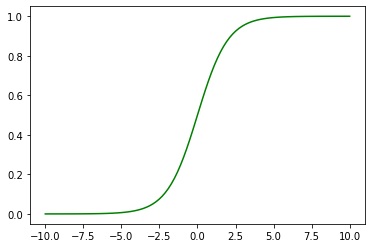

In [3]:
# The core idea of the method is the usage of the logistic function:
# 1 / (1 + e ** (-x))
x_coordinates = np.linspace(-10, 10, 100)
# print(x_coordinates)
# y_coordinates = []
# for x in x_coordinates
#   # do calculation
#   # append to the y list
# Alternatively, we can use list comprehension to create y coordinates
y_coordinates = [1 / (1 + np.exp(-x)) for x in x_coordinates]
# print(y_coordinates)
plt.plot(x_coordinates, y_coordinates, 'g-')

## Basic Case: Binary Classifier
- Suppose there are only two classes for the output feature: **Class 0** (the negative class) and **Class 1** (the positive class).
- A **binary classifer** tries to estimate the probability $p$ that a point belongs to Class 1.
- The probability that a point belongs to Class 0 is $1 - p$.
- Given the probability, the binary classifier will compare it with a chosen **threshold** (for example, 0.5), and then predict the class as
    - prediction = 1 if $\hat{p}$ $\ge$ threshold
    - prediction = 0 if $\hat{p}$ < threshold
- The **boundary** of decision regions is given by the curve formed by points whose probability equals to the threshold value.

## Example: The Iris Dataset

**Iris dataset** is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. [wiki page](https://en.wikipedia.org/wiki/Iris_flower_data_set)

- Import dataset using <code>sklearn.dataset.load_iris()</code>
- Explore the dataset: data description, feature names, data types, data histograms, scatter plots.
- Split the dataset into train_set and test_set
- Apply <code>sklearn.linear_model.LogisticRegression</code> to build a binary classifier on **Iris-Virginica**.
- Evaluate the performance of the model: Accuracy, cross-validation, precision vs. recall, confusion matrix...
- Visualize the model (show decision boundary)

<img src="https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png" width="600">


In [4]:
# Load the dataset
from sklearn import datasets
iris = datasets.load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# Description of the dataset
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# The measurements are included in the 'data' item
# iris['data']

In [8]:
# Convert the data into a data frame
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# iris['target']

In [10]:
# Add the target class
iris_df['target'] = iris['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# Explore the dataset
# How many examples are there for each type of Iris?

iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [12]:
# Flower names are contained in the original iris object
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
# Create a function that maps 0-2 to the actual type of iris
def get_target_name(x):
    return iris['target_names'][x]

x = iris_df.loc[1, 'target']
name = get_target_name(x)
print(x, name)

0 setosa


In [14]:
# Apply get_target_name() to all target values
iris_df['target_name'] = iris_df['target'].apply(get_target_name)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Text(0, 0.5, 'sepal width')

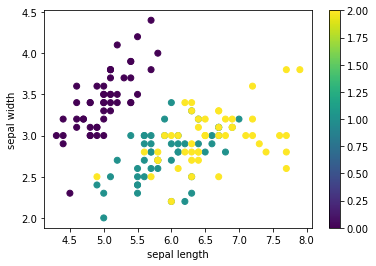

In [15]:
# Draw scatter plots.
plt.scatter(iris_df.loc[:, 'sepal length (cm)'], iris_df.loc[:, 'sepal width (cm)'],
            c=iris_df['target'])

plt.colorbar()
plt.xlabel("sepal length")
plt.ylabel("sepal width")

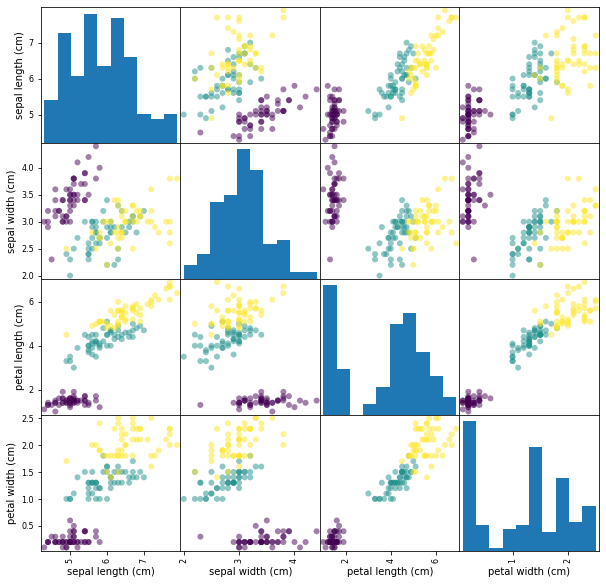

In [16]:
# Draw all scatter plots
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df.iloc[:, :4], figsize=(10, 10), marker='o',
               c=iris_df['target'])
plt.show()

## Build A Binary Classifier for Iris-Virginica

In [17]:
# Define a function is_virginica(target) that returns 1 if target is Virginica
# and 0 otherwise
def is_virginica(target):

    return int(target == 2)

In [18]:
# Apply function is_virginica() to the data frame, creating a new 
# column "Is_Virginica"

iris_df["Is_Virginica"] = iris_df['target'].apply(is_virginica)

# OR
# Define the function using the lambda expression
# iris_df["Is_Virginica"] = iris_df['target'].apply(lambda x: int(x == 2))

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,Is_Virginica
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0


In [19]:
# Find the number of 0s and 1s in the new column
iris_df['Is_Virginica'].value_counts()

0    100
1     50
Name: Is_Virginica, dtype: int64

In [20]:
# Train-test split
# Split the data frame into 85% training data and 15% test data
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(iris_df, test_size=0.15)

In [21]:
# Build the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(df_train[['sepal length (cm)', 
                    'sepal width (cm)', 
                    'petal length (cm)', 
                    'petal width (cm)']], df_train['Is_Virginica'])
# model.fit(df_train.iloc[:, :4], df_train['Is_Virginica'])

LogisticRegression()

In [22]:
# Apply the model on the test set.
test_predictions = model.predict(df_test[['sepal length (cm)', 
                                          'sepal width (cm)', 
                                          'petal length (cm)', 
                                          'petal width (cm)']])
print(test_predictions)

[0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0]


In [23]:
# display the actual labels
df_test['Is_Virginica'].values

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0])

In [24]:
# Since using .loc[] expression requires the full names of the columns, sometimes it
# is easier to use their underlying integer indices in .iloc[] expression

# For example, the expression 
# df_train.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# is equivalent to
# df_train.iloc[:, :4]

## Model Evaluation
- Classification accuracy
- Examine four categories using the confusion matrix:
    - True Positive
    - True Negative
    - False Positive
    - False Negative
- Precision, recall, and F1 score
- Cross Validation

In [25]:
# 1. Find the prediction accuracy on test set
from sklearn.metrics import accuracy_score

input_cols = ['sepal length (cm)',
            'sepal width (cm)',
            'petal length (cm)',
            'petal width (cm)']

# df_test.head()
# get model's prediction on the test records
test_predictions = model.predict(df_test[input_cols])
test_predictions = model.predict(df_test.loc[:, input_cols]) # .loc[x, y] extracts data from row X and column Y
test_predictions = model.predict(df_test.iloc[:, 0:4]) # .iloc[x, y] extracts data using underlying int indices

accuracy_score(df_test['Is_Virginica'], test_predictions)

1.0

In [26]:
# We can use the predict_proba() method to see the probability for classification
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)}) # display 4 decimal digits
test_probabilities = model.predict_proba(df_test[input_cols])

# We can apply a different threshold
# print((test_probabilities[:, 1] > 0.8).astype(int))

The accuracy score can be mislead. Consider the following scenario:
- Suppose that the model returns 0 for any input.
- Suppose that 99% of the test set are non-Virginica.
- The accuracy score for this model on this particular test set will be: 0.99

In order to make sure the model is indeed a good one, we need to examine its performance further.

In [27]:
# 2. confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(df_test['Is_Virginica'], test_predictions)



array([[17,  0],
       [ 0,  6]])

<img src="https://hackernoon.com/hn-images/1*YV7zy1NGN1-HGQxY56nc_Q.png" width="600">

### 3. Precision, Recall, and F-1 Score
**Precision** and **recall** are two important metrics that evaluates different aspects of the model. **F-1 score** is a combination of the precision and recall.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png" width="400">

### F-1 Score: A Combination of Precision and Recall

Since we expect the model to achieve high precision score and high recall score, we want to combine them into one score.

- $F-1 score = \frac{2}{\frac{1}{precision} + \frac{1}{recall}}$

In [28]:
# precision - recall - f1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(df_test['Is_Virginica'], test_predictions) # How much Virigincia iris are correctly identified?
recall = recall_score(df_test['Is_Virginica'], test_predictions) # How much Virginica predictions are correct?
f1 = f1_score(df_test['Is_Virginica'], test_predictions)
print(precision, recall, f1)

1.0 1.0 1.0


Consider the following scenario:
- Suppose that the model returns 0 for any input.
- Suppose that there are 99 non_Virginica and 1 Virginica in the test set.
- num_true_positive: 0
- num_false_positive: 0
- num_false_negative: 1
- precision: 0 / (0 + 0) --> undefined
- recall: 0 / (0 + 1) --> 0

### 4. cross validation
**Cross validation** is an efficient method that uses limited data to obtain multiple evaluations of the model.

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F4788946%2F82b5a41b6693a313b246f02d79e972d5%2FK%20FOLD.png?generation=1608195745131795&alt=media" width="600">

In [29]:
# Perform 5-fold cross validation
from sklearn.model_selection import cross_val_score

# The score will be the accuracy of each trial
cross_val_score(model, df_train[input_cols], df_train['Is_Virginica'], cv=5)

array([1.0000, 1.0000, 0.9200, 0.8800, 0.9200])

In [30]:
# Display precision score
cross_val_score(model, df_train[input_cols], df_train['Is_Virginica'],
                      scoring="precision", cv=5)

array([1.0000, 1.0000, 1.0000, 0.7500, 0.8750])

In [31]:
# Display recall score
cross_val_score(model, df_train[input_cols], df_train['Is_Virginica'],
                      scoring="recall", cv=5)

array([1.0000, 1.0000, 0.7778, 1.0000, 0.8750])

## Logistic Regression: Model Assumption
**Binary classifier model**: Logistic regression model assumes that the decision boundary is represented as a linear function:

$\hat{p} = \sigma(\theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n)$,

or equivalently,

$\log\frac{\hat{p}}{1 - \hat{p}} = \theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n,$
- n: number of input features.
- $x_1, ..., x_n$: input features
- $\hat{p}$: the estimated probability of data belonging to the class
- $\theta_0,...,\theta_n$: parameters of the model

**Alternative format**:

$\hat{p} = \sigma(\textbf{x}\cdot\theta^T).$

- $\textbf{x} = (1, x_1, ..., x_n)$.
- $\theta = (\theta_0, \theta_1, ..., \theta_n)$.
- $\sigma(t) = \frac{1}{1+e^{-t}}$: logistic function

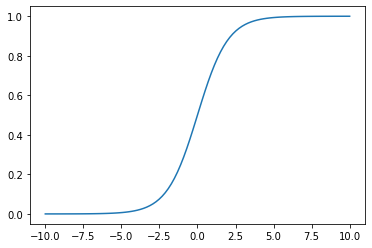

In [32]:
# Plot the graph of logistic function

# 1. Pick a list of x coordinates (`np.linspace`)
x = np.linspace(-10, 10, 100)
# 2. For each x, find the value of the function
values = 1 / (1 + np.exp(-x)) # Since x is a numpy array, we can apply
                                # np.exp directly
# 3. plot the list of x coordinates and y coordinates using
plt.plot(x, values, )


## Logistic Regression: Decision Rule

**Decision rule**: Pick a threshold (for example, 0.5), and then

- prediction = 1 if $\hat{p}$ $\ge$ threshold
- prediction = 0 if $\hat{p}$ < threshold

**Trade-off with threshold**:
- If threshold is chosen closer to 1, then the positive predictions are __more likely__ to be correct (fewer **false positives**). However, the negative predictions are __less likely__ to be correct.
- If threshold is chosen closer to 0, then the negative predictions are __more likely__ to be correct (fewer **false negatives**). However, the positive predictions are __less likely__ to be correct.

## Logistic Regression: Cost Function and Training Algorithm
For classification tasks, it is no longer appropriate to use MSE as the cost function.

**Cost (loss) function** for logistic regression:

\begin{equation}
c(\theta) = \left\{
\begin{array}{cc}
-\log(\hat{p}) & \textit{if  }y=1,\\
-\log(1-\hat{p}) & \textit{if  }y=0.
\end{array}
\right.
\end{equation}

The cost function $c(\theta)$:

- small if $y=1$ (data example belongs to the class) and $\hat{p}$ is close to 1.
- small if $y=0$ (data example does not belong to the class) and $\hat{p}$ is close to 0.
- is a convex function no matter what $y$ is.

**Uniformed expression for the cost function**:

$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}\big[y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})\big]$

- $c(\theta) = J(\theta)$ for $y=0$ and $y=1$.
- There is no equivalent of the Normal Equation.
- $J(\theta)$ is a convex function, so the *gradient descent algorithm* will guarantee to find its global minimum.
- $\frac{\partial J}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m}\big(\sigma(\textbf{x}^{(i)}\cdot\theta^T) - y^{(i)}\big)x_j^{(i)}$.

In [33]:
# Let's see why this cost function makes sense.
# Case 1: y = 1, p = 0.99.
# The prediction is very good, so the cost on this record should be small.

y = 1
p = 0.99

cost = -y * np.log(p) - (1 - y) * np.log(1 - p)
print(cost)

# Case 2: y = 0, p = 0.88.
# This is a bad prediction, so the cost should be large
y = 0
p = 0.88

cost = -y * np.log(p) - (1 - y) * np.log(1 - p)
print(cost)

0.01005033585350145
2.120263536200091


## Logistic Regression: Model Visualization
- Create a grid of points from a list of x coordinates and y coordinates.
- Use the model to obtain prediction probability on each point from the grid
- Find points with marginal probabilities.
- Plot the grid.

In [34]:
# Train a new logistic regression model on petal length and petal width only
model2 = LogisticRegression(solver='lbfgs')
model2.fit(df_train.iloc[:, 2:4], df_train['Is_Virginica'])

LogisticRegression()

In [35]:
# 1. Create a grid of points
x0, x1 = np.meshgrid(np.linspace(0, 7, 100),
                     np.linspace(0, 2.7, 100))
print(x0.shape, x1.shape)

(100, 100) (100, 100)


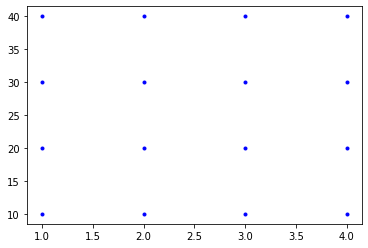

In [36]:
# Illustration of a meshgrid
x_coordinates = [1, 2, 3, 4]
y_coordinates = [10, 20, 30, 40]
xx, yy = np.meshgrid(x_coordinates, y_coordinates)
# print(xx)
# print(yy)
plt.plot(xx, yy, 'b.')

In [37]:
# 2. Obtain prediction probabilities
X_new = np.hstack([x0.reshape([-1, 1]), x1.reshape([-1, 1])])
y_new_prob = model2.predict_proba(X_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [38]:
# 3. Find boundary points.
# Which points give 0.5 probability?
indices = np.where((y_new_prob[:, 1] > 0.49) & (y_new_prob[:, 1] < 0.51))
X_boundary = X_new[indices]

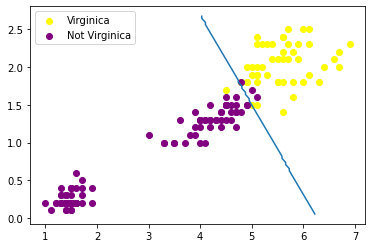

In [39]:
# 4. Plot the boundary
plt.plot(X_boundary[:, 0], X_boundary[:, 1])
index_virginica = (iris_df['Is_Virginica'] == 1)
index_not_virginica = (iris_df['Is_Virginica'] == 0)
plt.scatter(iris_df.loc[index_virginica, 'petal length (cm)'],
            iris_df.loc[index_virginica, 'petal width (cm)'],
            c='yellow',
            label='Virginica')
plt.scatter(iris_df.loc[index_not_virginica, 'petal length (cm)'],
            iris_df.loc[index_not_virginica, 'petal width (cm)'],
            c='purple',
            label='Not Virginica')
plt.legend()

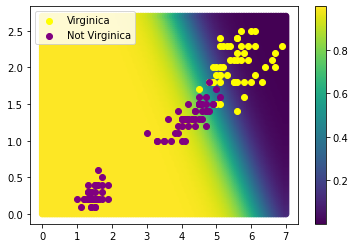

In [40]:
# 5. Plot probabilities
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new_prob[:, 0])
plt.colorbar()
plt.scatter(iris_df.loc[index_virginica, 'petal length (cm)'],
            iris_df.loc[index_virginica, 'petal width (cm)'],
            c='yellow',
            label='Virginica')
plt.scatter(iris_df.loc[index_not_virginica, 'petal length (cm)'],
            iris_df.loc[index_not_virginica, 'petal width (cm)'],
            c='purple',
            label='Not Virginica')
plt.legend()

# Build a Multi-Class Classifier with Logistic Regression

Now consider a classifier for more than 2 classes. Instead of outputting $p$ and $1-p$, this classifier will need to output $p_1, p_2, ..., p_n$, where $p_i$ is the probability of Class $i$. The output must satisfy:
1. Each $p_i$ takes value in $[0, 1]$.
2. The sum of all values must be 1.
3. If the true class of an object is k, then we want $p_k\approx 1$ and $p_i\approx 0$ for all $i\neq k$.

Requirement 1 and 2 is guaranteed if we use the following **softmax** transformation:
$$
(t_1, t_2, ..., t_n) ⟶ (\frac{e^{t_1}}{e^{t_1} + e^{t_2} +\cdots + e^{t_n}}, \frac{e^{t_2}}{e^{t_1} + e^{t_2} +\cdots + e^{t_n}}, ..., \frac{e^{t_n}}{e^{t_1} + e^{t_2} +\cdots + e^{t_n}})
$$

In [41]:
t1 = 3.2 
t2 = 1.2
t3 = -1_000_000

e_t1 = np.exp(t1)
e_t2 = np.exp(t2)
e_t3 = np.exp(t3)

print(e_t1, e_t2, e_t3)

p1 = e_t1 / (e_t1 + e_t2 + e_t3)
p2 = e_t2 / (e_t1 + e_t2 + e_t3)
p3 = e_t3 / (e_t1 + e_t2 + e_t3)

print(p1, p2, p3)

print("Sum:", np.sum([p1, p2, p3]))


24.532530197109352 3.3201169227365472 0.0
0.8807970779778825 0.11920292202211753 0.0
Sum: 1.0


In [42]:
# Use the Iris dataset as an example
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
# Split the data into traing set, and test set.
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(iris_df, test_size=0.2)
print(training_set.shape)
print(test_set.shape)

(120, 5)
(30, 5)


In [44]:
from sklearn.linear_model import LogisticRegression
input_cols = iris_df.columns[:4]
model = LogisticRegression(solver="newton-cg")
model.fit(training_set[input_cols], training_set['target'])

LogisticRegression(solver='newton-cg')

In [45]:
from sklearn.metrics import accuracy_score
predictions = model.predict(test_set[input_cols])
accuracy = accuracy_score(test_set['target'], predictions)
print(accuracy)

1.0


In [46]:
# Let's use cross-validation to check the consistency of the model
from sklearn.model_selection import cross_val_score
# We need a new model object that hasn't seen the entire training set
model2 = LogisticRegression(solver="newton-cg") 
cross_val_score(model2, training_set[input_cols], training_set['target'], cv=5)

array([1.0000, 0.8750, 0.9583, 1.0000, 0.9583])

In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_set['target'], predictions)

array([[ 8,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  9]])

In [48]:
model.coef_

array([[-0.4417, 0.8364, -2.3296, -0.9895],
       [0.6056, -0.2998, -0.2484, -0.7803],
       [-0.1639, -0.5366, 2.5780, 1.7698]])

In [49]:
model.intercept_

array([9.6060, 1.4868, -11.0928])

In [50]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [51]:
# Let's train a simpler model, with only two input variables.
simple_model = LogisticRegression()
simple_model.fit(iris_df[['petal length (cm)', 'petal width (cm)']], iris_df['target'])

LogisticRegression()

X1: [1.0000 1.0606 1.1212 1.1818 1.2424 1.3030 1.3636 1.4242 1.4848 1.5455
 1.6061 1.6667 1.7273 1.7879 1.8485 1.9091 1.9697 2.0303 2.0909 2.1515
 2.2121 2.2727 2.3333 2.3939 2.4545 2.5152 2.5758 2.6364 2.6970 2.7576
 2.8182 2.8788 2.9394 3.0000 3.0606 3.1212 3.1818 3.2424 3.3030 3.3636
 3.4242 3.4848 3.5455 3.6061 3.6667 3.7273 3.7879 3.8485 3.9091 3.9697
 4.0303 4.0909 4.1515 4.2121 4.2727 4.3333 4.3939 4.4545 4.5152 4.5758
 4.6364 4.6970 4.7576 4.8182 4.8788 4.9394 5.0000 5.0606 5.1212 5.1818
 5.2424 5.3030 5.3636 5.4242 5.4848 5.5455 5.6061 5.6667 5.7273 5.7879
 5.8485 5.9091 5.9697 6.0303 6.0909 6.1515 6.2121 6.2727 6.3333 6.3939
 6.4545 6.5152 6.5758 6.6364 6.6970 6.7576 6.8182 6.8788 6.9394 7.0000]
X2: [0.0000 0.0253 0.0505 0.0758 0.1010 0.1263 0.1515 0.1768 0.2020 0.2273
 0.2525 0.2778 0.3030 0.3283 0.3535 0.3788 0.4040 0.4293 0.4545 0.4798
 0.5051 0.5303 0.5556 0.5808 0.6061 0.6313 0.6566 0.6818 0.7071 0.7323
 0.7576 0.7828 0.8081 0.8333 0.8586 0.8838 0.9091 0.9343 0.9596 0.98

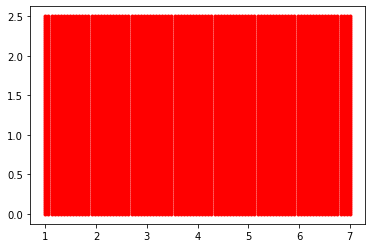

In [60]:
# Plot the decision regions of this classifier

# We need to create a list of points that represents the area we want to examine.

# points = [(0, 0), (0.1, 0), ..., (0, 2), (0.1, 0), (0.1, 0.1), ..., (0.1, 2), (0.2, 0), ...., (2, 1.9), (2, 2)]
# These points represents the area [0, 2] * [0, 2].

X1s = np.linspace(1.0, 7.0, 100)
X2s = np.linspace(0.0, 2.5, 100)
print("X1:", X1s)
print("X2:", X2s)
points_x1, points_x2 = np.meshgrid(X1s, X2s)
print(points_x1)
print(points_x2)
# Visualize these points
plt.plot(points_x1, points_x2, 'r.')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


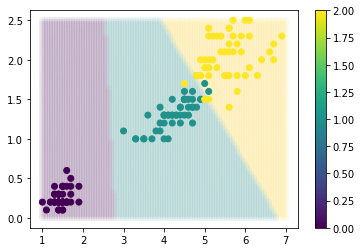

In [75]:
# Now that we have a dense representation of this area, let's ask the model to label them.
points_x1 = points_x1.reshape([100*100, 1])
points_x2 = points_x2.reshape([100*100, 1]) 
points = np.hstack([points_x1, points_x2])
# print(points)
predictions = simple_model.predict(points)
# print(predictions[:20])
plt.scatter(points_x1, points_x2, c=predictions, alpha=0.03)
# Let's also add the training set
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=iris_df['target'])
plt.colorbar()

In [77]:
predictions_for_confusion_matrix = simple_model.predict(iris_df[['petal length (cm)', 'petal width (cm)']])
confusion_matrix(iris_df['target'], predictions_for_confusion_matrix)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])